In [56]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/getdatachimp/demo/main/iris.csv')
df


,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,variety,collector
0,0,5.1,3.5,1.4,0.2,Setosa,Sam
1,1,4.9,3.0,1.4,0.2,Setosa,Sam
2,2,4.7,3.2,1.3,0.2,Setosa,Sam
3,3,4.6,3.1,1.5,0.2,Setosa,Sam
4,4,5.0,3.6,1.4,0.2,Setosa,Sam
...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Virginica,Sam
146,146,6.3,2.5,5.0,1.9,Virginica,Sam
147,147,6.5,3.0,5.2,2.0,Virginica,Sam
148,148,6.2,3.4,5.4,2.3,Virginica,Sam


In [40]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
pipeline = make_pipeline(
  StandardScaler(),
  LogisticRegression()
)

model = pipeline.fit(X_train, y_train)

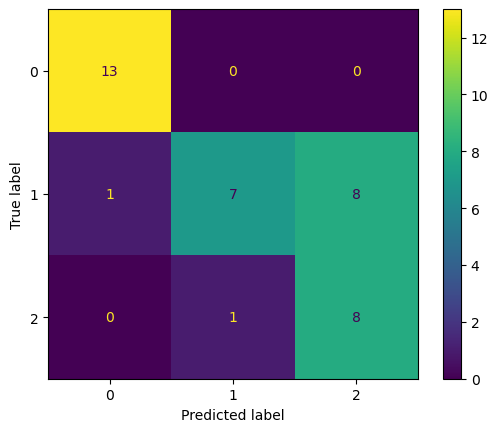

In [42]:
y_pred = model.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [43]:
from doubtlab.ensemble import DoubtEnsemble
from doubtlab.reason import ProbaReason, WrongPredictionReason

reasons = {
    'proba' : ProbaReason(model=model),
    'wrong_pred': WrongPredictionReason(model=model),
}

doubt = DoubtEnsemble(**reasons)

indices = doubt.get_indices(X_train, y_train)
predicates = doubt.get_predicates(X_train, y_train)

In [44]:
predicates

,predicate_proba,predicate_wrong_pred
99,1.0,1.0
55,1.0,1.0
92,1.0,1.0
41,1.0,1.0
96,1.0,1.0
...,...,...
120,0.0,0.0
102,0.0,0.0
12,0.0,0.0
109,0.0,0.0


In [45]:
df = df.join(predicates)
df.iloc[predicates.index].head(len(indices))

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,variety,collector,predicate_proba,predicate_wrong_pred
99,99,5.7,2.8,4.1,1.3,Versicolor,Eric,1.0,1.0
55,55,5.7,2.8,4.5,1.3,Versicolor,Eric,1.0,1.0
92,92,5.8,2.6,4.0,1.2,Versicolor,Eric,1.0,1.0
41,41,4.5,2.3,1.3,0.3,Setosa,Sam,1.0,1.0
96,96,5.7,2.9,4.2,1.3,Versicolor,Eric,1.0,1.0
68,68,6.2,2.2,4.5,1.5,Versicolor,Eric,1.0,1.0
64,64,5.6,2.9,3.6,1.3,Versicolor,Eric,1.0,1.0
61,61,5.9,3.0,4.2,1.5,Versicolor,Eric,0.0,1.0
106,106,4.9,2.5,4.5,1.7,Virginica,Sam,0.0,1.0
87,87,6.3,2.3,4.4,1.3,Versicolor,Eric,0.0,1.0


In [48]:
import pandera as pa

schema = pa.DataFrameSchema({
    'variety': pa.Column(str),
    'petal_length': pa.Column(float, [
        pa.Check(lambda g: g["Versicolor"].max() <= 30, groupby="variety"),
        pa.Check(lambda g: g["Setosa"].max() <= 10, groupby="variety"),
        pa.Check(lambda g: g["Virginica"].max() <= 40, groupby="variety"),
    ])
})

schema.validate(df)

SchemaError: <Schema Column(name=petal_length, type=DataType(float64))> failed series or dataframe validator 0:
<Check <lambda>>

In [55]:
%connect_info

{
  "shell_port": 9002,
  "iopub_port": 9004,
  "stdin_port": 9003,
  "control_port": 9001,
  "hb_port": 9000,
  "ip": "127.0.0.1",
  "key": "7ac7cafa-3f42-4165-90b3-ec0815f2543c",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-v2-1674wbATcwTW9uQA.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
